## Clustering analysis

### Creat the dataset

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab 
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PowerTransformer

In [7]:
df = pd.read_csv("./Sales_Transactions_Dataset_Weekly.csv")

In [8]:
df.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [9]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [10]:
# Determine centroids
centres =[[11,12],[10,8],[13,12]]

# Create dataset
X, y = make_blobs(n_samples=300, centers=centres, cluster_std=0.5, random_state=100)

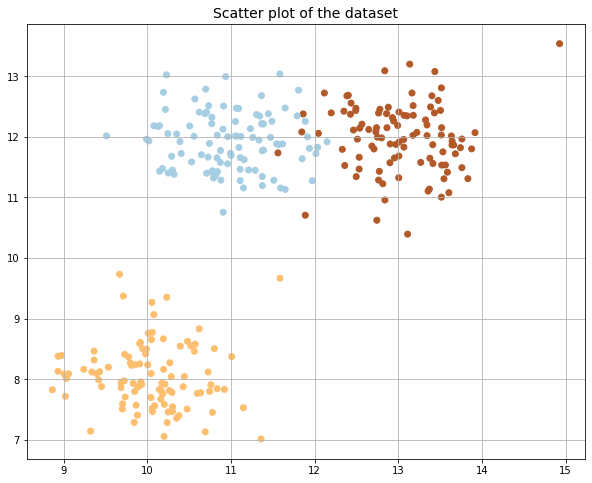

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')
plt.grid()
plt.title("Scatter plot of the dataset", fontsize=14)
plt.show()

#### Scale the dataset

In [12]:
X = StandardScaler().fit_transform(X)

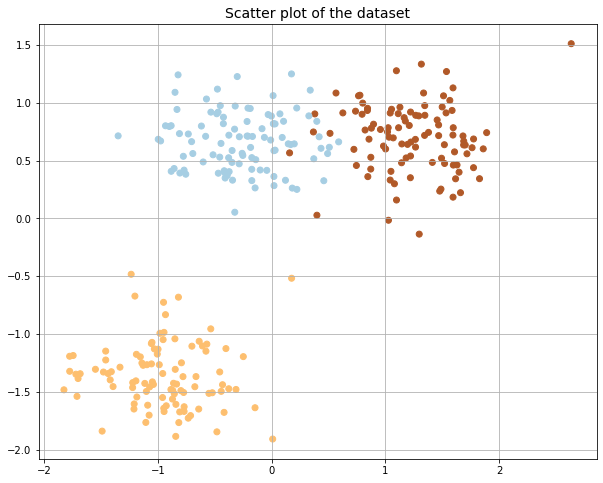

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')
plt.grid()
plt.title("Scatter plot of the dataset", fontsize=14)
plt.show()

#### Apply K- means clustering

In [14]:
from sklearn.cluster import KMeans

#### Finding optimal number of cluster in k-means(Elbow Method)

In [15]:
K = range(2, 10)

In [16]:
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd = model.inertia_   # .inertia_ attribute will give us the SSD
    sum_of_squared_distances.append(ssd)

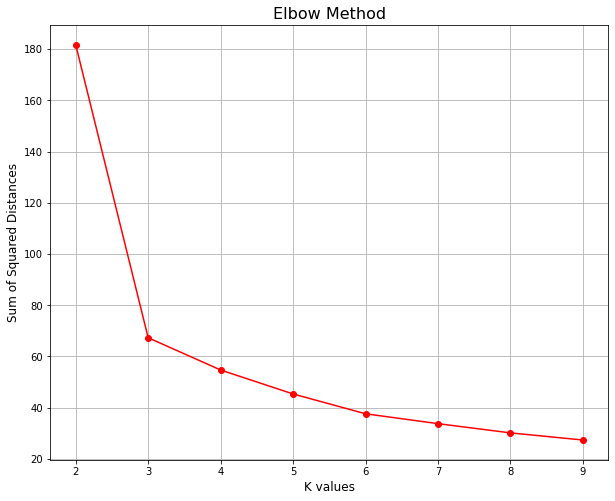

In [17]:
plt.figure(figsize=(10,8))
plt.plot(K, sum_of_squared_distances, "ro-")
plt.xlabel("K values", fontsize=12)
plt.ylabel("Sum of Squared Distances",fontsize=12)
plt.title("Elbow Method",fontsize=16)
plt.grid()
plt.show()

### Fit the KMeans cluster with right value of k

In [18]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [19]:
labels = model.predict(X)

In [20]:
centroids = model.cluster_centers_

In [21]:
centroids

array([[-0.97815345, -1.36900197],
       [ 1.25468668,  0.70058973],
       [-0.25361265,  0.64925632]])

### Plot the output of kMeans clustering

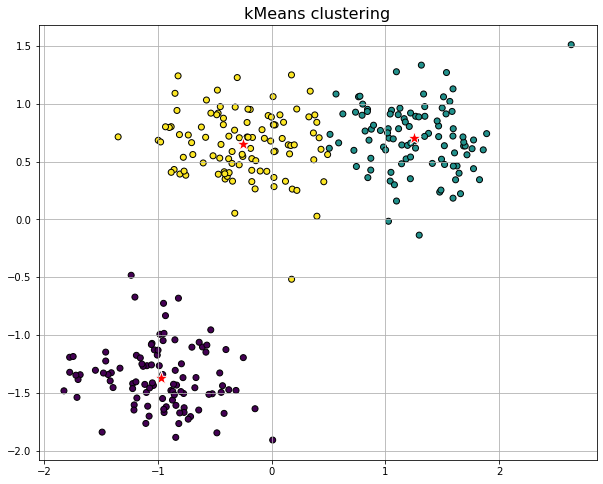

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=labels, edgecolor='k')
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=200, marker='*', edgecolor='w')
plt.grid()
plt.title("kMeans clustering", fontsize=16)
plt.show()

#### Obtain the Sihoutte Score of the clusters

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
s = silhouette_score(X, labels, metric='euclidean')

In [25]:
print(f"The Silhouette score of KMeans clustering: {s:0.2f}",)

The Silhouette score of KMeans clustering: 0.64


### Apply DBSCAN clustering

In [26]:
from sklearn.cluster import DBSCAN

#### Determine eps and minPts

In [27]:
eps = 0.40
minPts = 16

#### Create the DBSCAN model and fit it

In [28]:
dbscan_model = DBSCAN(eps=eps, min_samples=minPts)

In [29]:
dbscan_model.fit(X)

DBSCAN(eps=0.4, min_samples=16)

In [30]:
labels_dbscan = dbscan_model.fit_predict(X)

#### Plot the output of DBSCAN

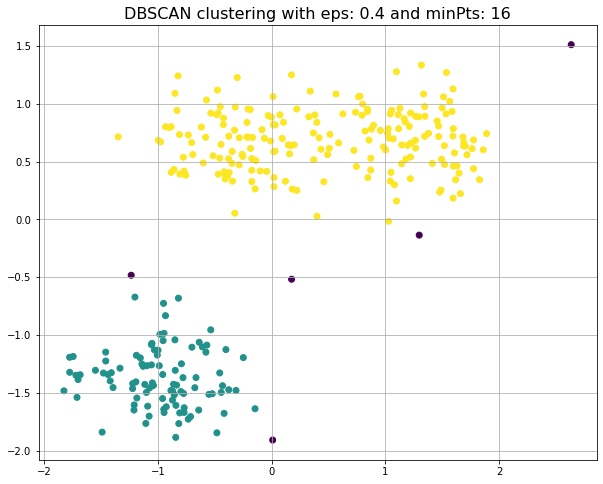

In [31]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=labels_dbscan)
plt.title(f"DBSCAN clustering with eps: {eps} and minPts: {minPts}", fontsize=16)
plt.grid()
plt.show()

#### Obtain the silhoutte score

In [32]:
print(f"The silhoutte score: {silhouette_score(X, labels_dbscan, metric='euclidean'):0.2f}")

The silhoutte score: 0.54


In [33]:
range_of_eps = np.arange(0.1, 1.0, 0.1)
range_of_minPts = np.arange(5, 40, 5)

In [34]:
eps_minpts_comb = [(x,y) for x in range_of_eps for y in range_of_minPts]

In [35]:
def find_optimal_eps_minpts(values):
    best_score = -1
    for eps, minpts in values:
        dbscan_model = DBSCAN(eps=eps, min_samples=minpts)
        dbscan_model.fit(X)
        y_pred = dbscan_model.fit_predict(X)
        n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
        if n_clusters >= 2:
            score = silhouette_score(X, labels=y_pred, metric='euclidean')
            if score > best_score:
                best_score = score
                best_eps = eps
                best_minpts = minpts
    return best_eps, best_minpts, best_score

In [36]:
find_optimal_eps_minpts(eps_minpts_comb)

(0.4, 10, 0.5676171965492521)

#### Optimal DBSCAN model

In [37]:
dbscan_model = DBSCAN(eps=0.6, min_samples=30)

In [38]:
y_pred = dbscan_model.fit_predict(X)

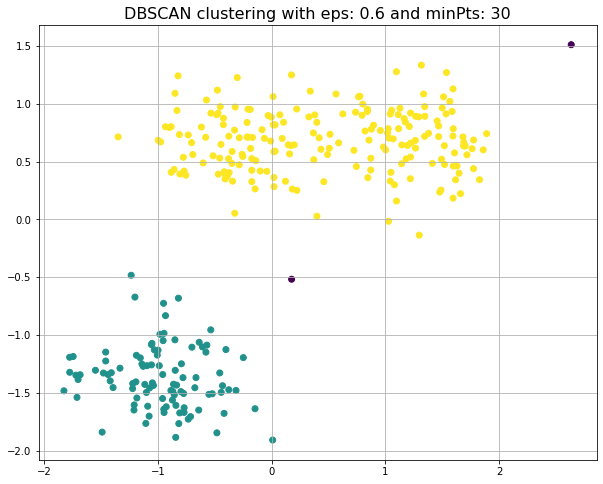

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title(f"DBSCAN clustering with eps: 0.6 and minPts: 30", fontsize=16)
plt.grid()
plt.show()

#### Agglomeartive Clustering

In [40]:
from sklearn.cluster import AgglomerativeClustering

#### Create agglomearive clustering model and fit it

In [41]:
agg_cluster = AgglomerativeClustering(n_clusters=3)

In [42]:
y_pred_agg = agg_cluster.fit_predict(X)

#### Plot the output of Agglomerative Clustering

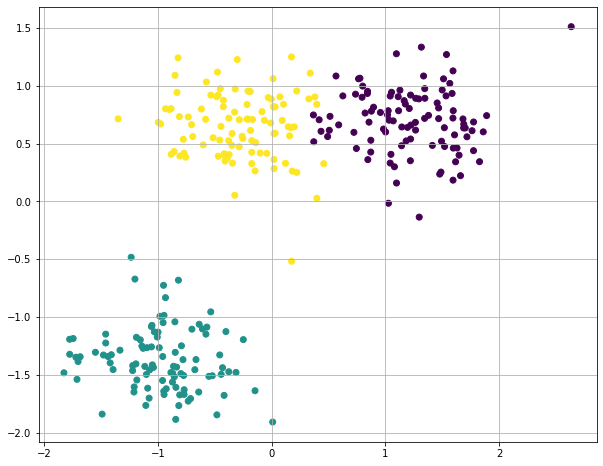

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=y_pred_agg)
plt.grid()
plt.show()

#### Silhoutte score of Agglomerative Clustering

In [44]:
silhouette_score(X, y_pred_agg, metric='euclidean')

0.6320241451592142

#### Visualizing the dendograms of Agglomerative Clustering

In [45]:
import scipy.cluster.hierarchy as shc

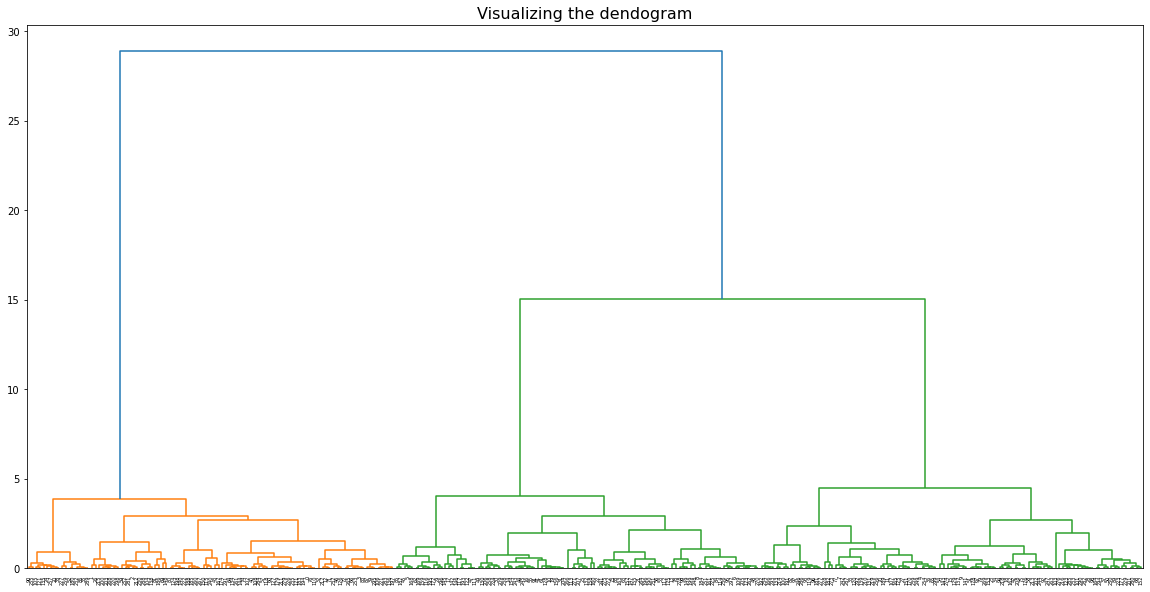

In [46]:
plt.figure(figsize=(20,10))
Dendogram = shc.dendrogram((shc.linkage(X, method='ward')))
plt.title("Visualizing the dendogram", size=16)
plt.show()

### JNB Clustering

In [26]:
# Downloading Fast Jenks breaks for Python
!pip install jenkspy

In [27]:
from jenkspy import JenksNaturalBreaks
jnb = JenksNaturalBreaks()

# Checking Max Silhoutte Scoring for determining the Feature
sh_list = []

for i in range(X.shape[1]):
    jnb.fit(X[:,i])
    sh_score = silhouette_score(X,jnb.labels_, metric = 'euclidean')
    sh_list.append(sh_score)

jnb_criterion = sh_list.index(max(sh_list))
jnb.fit(X[:,jnb_criterion])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

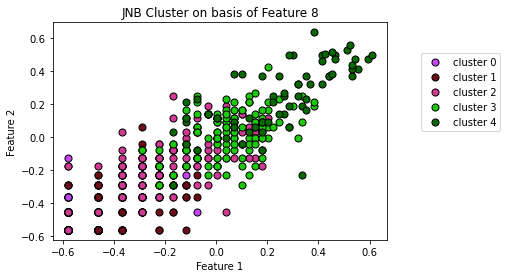

In [28]:
# JNB Plotting
plot_clusters(5, jnb.labels_)
plt.legend(scatterpoints=1,loc = (1.1,0.5))
plt.title('JNB Cluster on basis of Feature {}'.format(jnb_criterion + 1))
plt.show()

In [29]:
# Silhouette Scoring
print('Silhouette Score for Feature {crit} JNB Clustering: {val}'.format(crit = jnb_criterion, val = silhouette_score(X, jnb.labels_ , metric = 'euclidean')))

Silhouette Score for Feature 7 JNB Clustering: 0.25284697343590135


## Principal Componenet Analysis (PCA)

In [20]:
df.head(10)

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
5,P6,3,3,2,7,6,3,8,6,6,...,0.36,0.18,0.36,0.27,0.55,0.45,0.27,0.27,0.91,0.55
6,P7,4,8,3,7,8,7,2,3,10,...,0.20,0.30,0.30,0.60,0.20,0.60,0.20,0.40,0.20,0.10
7,P8,8,6,10,9,6,8,7,5,10,...,0.58,0.92,0.08,0.42,0.42,0.25,0.33,0.08,0.50,0.50
8,P9,14,9,10,7,11,15,12,7,13,...,0.53,0.13,0.67,0.00,0.27,0.27,0.47,0.60,0.27,0.67
9,P10,22,19,19,29,20,16,26,20,24,...,0.21,0.33,0.08,0.63,0.17,0.29,0.38,0.58,0.38,0.46


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB


In [22]:
y_values = df['Product_Code'].values

In [23]:
X_values = df.iloc[:,2:].values

In [24]:
X_values.shape

(811, 105)

### Standardize the features

In [25]:
means = X_values.mean(axis = 0)

In [26]:
std_devs = X_values.std(axis = 0)

In [27]:
X_std = (X_values - means)/std_devs

In [28]:
X_std.shape

(811, 105)

In [29]:
np.round(X_std.mean(axis = 0))

array([ 0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,
        0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0., -0.,  0., -0.,  0.,
       -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,
       -0., -0., -0., -0., -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,
        0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0.,
       -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
       -0., -0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,
        0.])

In [30]:
np.round(X_std.std(axis=0))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

### Calculate the covariance matrix

In [31]:
C = np.corrcoef(X_std.T)

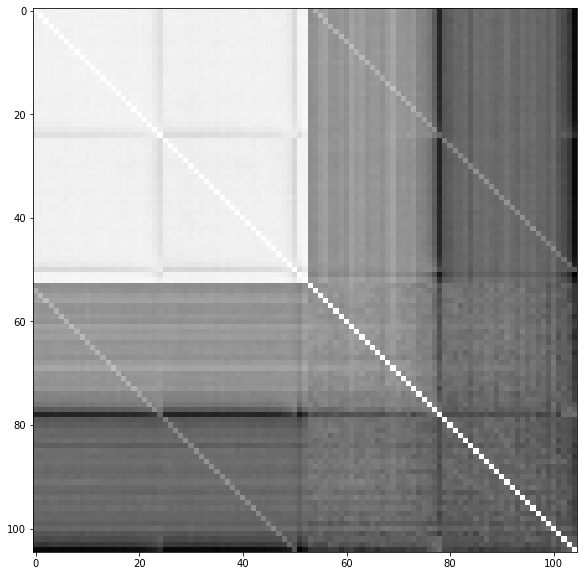

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(C, cmap='gray', interpolation = 'nearest')
plt.show()

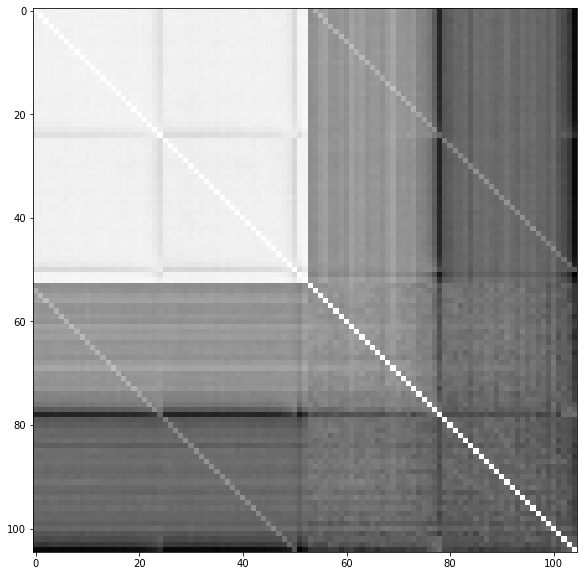

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(np.corrcoef(X_values.T), cmap='gray', interpolation='nearest')
plt.show()

In [34]:
np.allclose(np.corrcoef(X_std.T), np.corrcoef(X_values.T))

True

#### Calculate the Eigen values and Eigen Vectors of Covariance Matrix

In [35]:
w, v = np.linalg.eig(C)

In [36]:
v.shape

(105, 105)

#### Scree plot (with normalized values of eigen values)

In [37]:
sum_of_eig_values = np.sum(w)

In [38]:
w_norm = w / sum_of_eig_values

In [39]:
explained_variance = np.cumsum(w_norm)

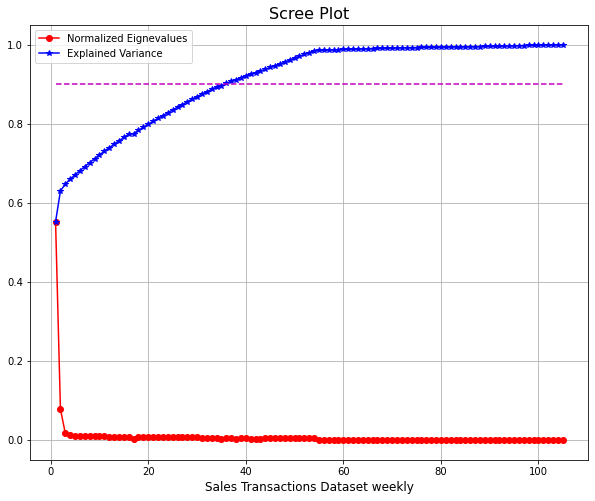

In [40]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(1, len(w_norm)+1), w_norm, 'ro-', label='Normalized Eignevalues')
plt.plot(np.arange(1, len(w_norm)+1), explained_variance, 'b*-', label='Explained Variance')
plt.grid()
plt.title("Scree Plot", fontsize=16)
plt.xlabel("Sales Transactions Dataset weekly", fontsize=12)
plt.plot(np.arange(1, len(w_norm)+1), [0.9]*len(w_norm), linestyle='dashed', color='m')
plt.legend()
plt.show()

#### Select the number of components

In [41]:
k = 7

U = v[:,:k]

In [42]:
U.shape

(105, 7)

#### Transform the dataset

In [43]:
X_transform = np.dot(X_std, U)

In [44]:
X_transform.shape

(811, 7)

### Visualize the data in 2D

In [45]:
X_tr_viz = np.dot(X_std, v[:,:2])

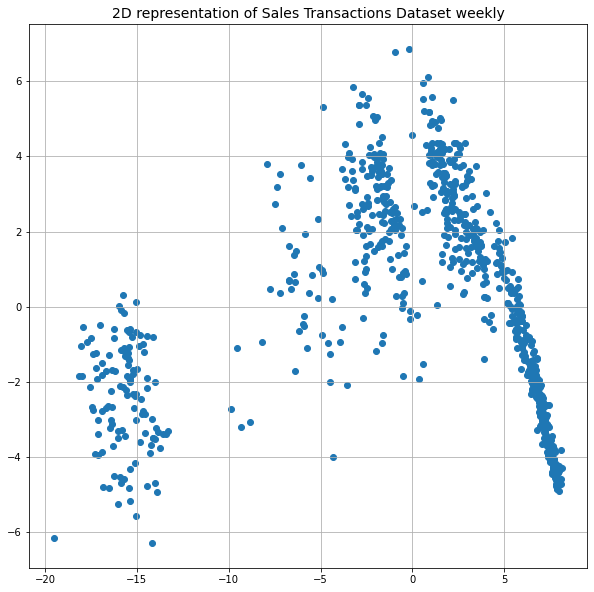

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(X_tr_viz[:,0], X_tr_viz[:,1])
plt.grid()
plt.title("2D representation of Sales Transactions Dataset weekly", fontsize=14)
plt.show()

In [47]:
import seaborn as sns

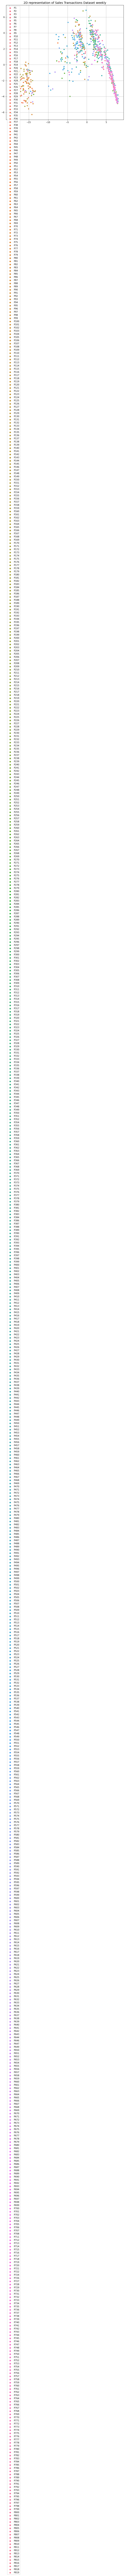

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_tr_viz[:,0], y=X_tr_viz[:,1], hue=y_values)
plt.grid()
plt.title("2D representation of Sales Transactions Dataset weekly", fontsize=14)
plt.show()